I recommend to view the file 

# [1- Introduction](#1)

# [2- Loading basic libraries](#2)

# [3- Data frame loading and cleaning](#3)

 - ## [A- Data loading and selection columns](#3.A)
 - ## [B- Treatment of variables](#3.B)
     - ### [B.1- Categoricals variables](#3.B.1)
     - ### [B.2- Datetime variables](#3.B.2)
     - ### [B.3- Calculating Age](#3.B.3)
     - ### [B.4- n_comor and n_sym columns creation](#3.B.4)
 - ## [C- Filtered](#3.C)
 - ## [D- At last](#3.D)

<a id='1'></a>

---

# 1. Introduction

- COVID-19 has caused more than 219 million infections worldwide and resulted in more than 4.55 million deaths. The COVID-19 disease has resulted in a substantial cause of morbidity and mortality across the world. COVID19 disease presents with a wide range of clinical features spanning from no symptoms to multi-organ failure and associated with high mortality.

- Since the epidemic, several mortality risk factors have been identified: genetic predisposing factors; demographic factors (older age and male sex); presence of comorbidities (cardiac, metabolic); several laboratory findings (lymphocyte count, lactic dehydrogenase, ferritin); imaging findings.

<a id='2'></a>

---

# 2. Loading basic libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

<a id='3'></a>

---

# 3. Data frame loading and cleaning

In [157]:
df = pd.read_csv("MICRODADOS.csv", index_col = 0, encoding = "latin-1", sep = ";")

In [158]:
df.head(2)

,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
DataNotificacao,,,,,,,,,,,,,,,,,,,,,
2021-11-11,2021-11-11,2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2021-11-11,2021-11-11,2021-11-11,NaN,2021-11-11,NaN,NaN,2021-11-11,NaN,Descartados,Ignorado,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


In [159]:
df = df.reset_index().drop("DataNotificacao", axis = 1)
df.head(2)

,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-11-11,2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
1,2021-11-11,2021-11-11,NaN,2021-11-11,NaN,NaN,2021-11-11,NaN,Descartados,Ignorado,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


In [160]:
df.shape

(2209062, 44)

Observing with greater details the columns.

In [161]:
df.columns

Index(['DataCadastro', 'DataDiagnostico', 'DataColeta_RT_PCR',
       'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'],
      dtype='object')

In [162]:
df.iloc[:2, :15]

,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria
0,2021-11-11,2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,-,-,Em Aberto,SERRA,VALPARAÍSO,10 a 19 anos
1,2021-11-11,2021-11-11,NaN,2021-11-11,NaN,NaN,2021-11-11,NaN,Descartados,Ignorado,Laboratorial,Encerrado,VITORIA,PRAIA DO CANTO,60 a 69 anos


In [163]:
df.iloc[:2, 15:30]

,IdadeNaDataNotificacao,Sexo,RacaCor,Escolaridade,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal
0,"19 anos, 8 meses, 21 dias",M,Ignorado,Ignorado,Não se aplica,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não
1,"63 anos, 11 meses, 16 dias",F,Branca,Educação superior completa,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [164]:
df.iloc[:2, 30:]

,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
1,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


The most relevant columns are conserved to carry out the analysis.

In [165]:
covid_cols = ["DataCadastro", "DataDiagnostico", "DataObito", "ResultadoTesteRapido", "ResultadoRT_PCR",
              "Classificacao", "FicouInternado", "Evolucao",
              "Sexo", "IdadeNaDataNotificacao", "FaixaEtaria", "RacaCor",
              "Gestante", "PossuiDeficiencia",         
              "Febre", "DificuldadeRespiratoria", "Tosse", "Coriza", "DorGarganta", "Diarreia", "Cefaleia",
              "ComorbidadePulmao", "ComorbidadeCardio", "ComorbidadeRenal", "ComorbidadeDiabetes", "ComorbidadeTabagismo", "ComorbidadeObesidade"]

In [166]:
df = df[covid_cols] 

In [167]:
df.columns

Index(['DataCadastro', 'DataDiagnostico', 'DataObito', 'ResultadoTesteRapido',
       'ResultadoRT_PCR', 'Classificacao', 'FicouInternado', 'Evolucao',
       'Sexo', 'IdadeNaDataNotificacao', 'FaixaEtaria', 'RacaCor', 'Gestante',
       'PossuiDeficiencia', 'Febre', 'DificuldadeRespiratoria', 'Tosse',
       'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao',
       'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
       'ComorbidadeTabagismo', 'ComorbidadeObesidade'],
      dtype='object')

Column name translation.

In [168]:
df.columns = ["Register_date", "Diagnosis_date", "Death_date",
              "Result_PCR", "Result_RapidTest", "Classification", "Hospitalized", "Evolution", 
              "Gender", "Notification_age", "Range_age", "Race", 
              "Pregnant", "Disabled", "Fever", "Breath_difficulty", "Cough", "Rhinitis", "Throat_pain", 
              "Diarrhea", "Headache", "Comorbidity_pulmonary", "Comorbidity_cardiac", "Comorbidity_renal", 
              "Comorbidity_diabetes", "Comorbidity_smoking", "Comorbidity_obesity"]

In [169]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Pregnant',
       'Disabled', 'Fever', 'Breath_difficulty', 'Cough', 'Rhinitis',
       'Throat_pain', 'Diarrhea', 'Headache', 'Comorbidity_pulmonary',
       'Comorbidity_cardiac', 'Comorbidity_renal', 'Comorbidity_diabetes',
       'Comorbidity_smoking', 'Comorbidity_obesity'],
      dtype='object')

<a id='3.B'></a>

## 3.B Treatment of variables

Search for nulls

In [170]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

Death_date               0.99214
Register_date            0.00000
Fever                    0.00000
Comorbidity_smoking      0.00000
Comorbidity_diabetes     0.00000
Comorbidity_renal        0.00000
Comorbidity_cardiac      0.00000
Comorbidity_pulmonary    0.00000
Headache                 0.00000
Diarrhea                 0.00000
Throat_pain              0.00000
Rhinitis                 0.00000
Cough                    0.00000
Breath_difficulty        0.00000
Disabled                 0.00000
Diagnosis_date           0.00000
Pregnant                 0.00000
Race                     0.00000
Range_age                0.00000
Notification_age         0.00000
Gender                   0.00000
Evolution                0.00000
Hospitalized             0.00000
Classification           0.00000
Result_RapidTest         0.00000
Result_PCR               0.00000
Comorbidity_obesity      0.00000
dtype: float64

- `Death_date` appears to have 90% null data, this situation will be discussed later.

- Some columns seem to not have nulls directly, let's see what cause this.

<a id='3.B.1'></a>

### 3.B.1 Categoricals variables

Printing each category of each categorical variable.

In [171]:
def categoricals(dataframe):
    for x in range(dataframe.shape[1]):
        if "date" in dataframe.columns[x]:
            pass
        else:
            print(dataframe.columns[x], "\n", dataframe[dataframe.columns[x]].unique(), "\n")

In [172]:
categoricals(df)

Result_PCR 
 ['Não Informado' 'Negativo' 'Positivo' 'Inconclusivo'] 

Result_RapidTest 
 ['Não Informado' 'Inconclusivo' 'Negativo' 'Positivo'] 

Classification 
 ['Suspeito' 'Descartados' 'Confirmados'] 

Hospitalized 
 ['Não Informado' 'Não' 'Ignorado' 'Sim'] 

Evolution 
 ['-' 'Ignorado' 'Cura' 'Óbito por outras causas' 'Óbito pelo COVID-19'] 

Gender 
 ['M' 'F' 'I'] 

Notification_age 
 ['19 anos, 8 meses, 21 dias' '63 anos, 11 meses, 16 dias'
 '35 anos, 5 meses, 26 dias' ... '94 anos, 7 meses, 7 dias'
 '99 anos, 7 meses, 26 dias' '97 anos, 2 meses, 2 dias'] 

Range_age 
 ['10 a 19 anos' '60 a 69 anos' '30 a 39 anos' '0 a 4 anos' '40 a 49 anos'
 '20 a 29 anos' '70 a 79 anos' '50 a 59 anos' '80 a 89 anos' '05 a 9 anos'
 '90 anos ou mais' '-'] 

Race 
 ['Ignorado' 'Branca' 'Parda' 'Preta' 'Amarela' 'Indigena'] 

Pregnant 
 ['Não se aplica' 'Não' '3º trimeste' 'Ignorado'
 'Idade gestacional ignorada' '2º trimeste' '1º trimeste'] 

Disabled 
 ['Não' 'Sim' 'Não Informado'] 

Fever 
 ['N

- Some columns present values expressed as `Não Informado`, `-`, `Ignorado`, etc. 

- These variables will be replaced by `np.nan`.

- Convert to `type = category` if is necessary.

In [173]:
uninformed_cols = ["Result_RapidTest", "Result_PCR", "Hospitalized", "Disabled"]
df[uninformed_cols] = df[uninformed_cols].replace({"Não Informado": np.nan, "Inconclusivo": np.nan, "Ignorado": np.nan}).astype("category")

In [174]:
symptoms_cols = ["Fever", "Breath_difficulty", "Cough", "Rhinitis", "Throat_pain", "Diarrhea", "Headache"]
df[symptoms_cols] = df[symptoms_cols].replace("-", np.nan).astype("category")

In [175]:
comorbidity_cols = ["Comorbidity_pulmonary", "Comorbidity_cardiac", "Comorbidity_renal", "Comorbidity_diabetes", "Comorbidity_smoking", "Comorbidity_obesity"]
df[comorbidity_cols] = df[comorbidity_cols].replace("-", np.nan).astype("category")

In [176]:
df["Evolution"] = df["Evolution"].replace({"-": np.nan, "Ignorado": np.nan})

In [177]:
df["Gender"] = df["Gender"].replace("I", np.nan)

In [178]:
df["Race"] = df["Race"].replace("Ignorado", np.nan).astype("category")

In [179]:
dict_pregnant = {"Ignorado": np.nan, 
                 "Não se aplica": np.nan, 
                 "1º trimeste": "Yes", 
                 "2º trimeste": "Yes", 
                 "3º trimeste": "Yes", 
                 "Idade gestacional ignorada": "Yes"}   
df["Pregnant"] = df["Pregnant"].replace(dict_pregnant).astype("category")

In [180]:
df[["Classification", "Range_age"]] = df[["Classification", "Range_age"]].astype("category")       

In [181]:
categoricals(df)

Result_PCR 
 [NaN, 'Negativo', 'Positivo']
Categories (2, object): ['Negativo', 'Positivo'] 

Result_RapidTest 
 [NaN, 'Negativo', 'Positivo']
Categories (2, object): ['Negativo', 'Positivo'] 

Classification 
 ['Suspeito', 'Descartados', 'Confirmados']
Categories (3, object): ['Confirmados', 'Descartados', 'Suspeito'] 

Hospitalized 
 [NaN, 'Não', 'Sim']
Categories (2, object): ['Não', 'Sim'] 

Evolution 
 [nan 'Cura' 'Óbito por outras causas' 'Óbito pelo COVID-19'] 

Gender 
 ['M' 'F' nan] 

Notification_age 
 ['19 anos, 8 meses, 21 dias' '63 anos, 11 meses, 16 dias'
 '35 anos, 5 meses, 26 dias' ... '94 anos, 7 meses, 7 dias'
 '99 anos, 7 meses, 26 dias' '97 anos, 2 meses, 2 dias'] 

Range_age 
 ['10 a 19 anos', '60 a 69 anos', '30 a 39 anos', '0 a 4 anos', '40 a 49 anos', ..., '50 a 59 anos', '80 a 89 anos', '05 a 9 anos', '90 anos ou mais', '-']
Length: 12
Categories (12, object): ['-', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', ..., '60 a 69 anos', '70 a 79 anos', '80 a 89 anos'

Now there is a better interpretation of how many null values the dataset has.

In [182]:
((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending = False)

Death_date               99.21
Evolution                72.34
Result_PCR               60.98
Hospitalized             60.07
Result_RapidTest         54.71
Pregnant                 46.15
Race                     25.40
Disabled                  1.38
Comorbidity_obesity       0.12
Comorbidity_cardiac       0.09
Comorbidity_smoking       0.09
Comorbidity_diabetes      0.09
Comorbidity_pulmonary     0.09
Comorbidity_renal         0.08
Headache                  0.08
Throat_pain               0.07
Fever                     0.07
Cough                     0.07
Rhinitis                  0.07
Diarrhea                  0.07
Breath_difficulty         0.06
Gender                    0.03
Notification_age          0.00
Range_age                 0.00
Diagnosis_date            0.00
Classification            0.00
Register_date             0.00
dtype: float64

- Eliminating those patients who have more or equal than 2 `comorbidities = np.nan`.

- Proceed in the same way with `symptoms`.

In [183]:
df = df.dropna(subset = "Gender")

In [184]:
df = df.dropna(subset = comorbidity_cols, thresh = 5)

In [185]:
df = df.dropna(subset = symptoms_cols, thresh = 5)

Understanding `Classification` column before removing their null values.

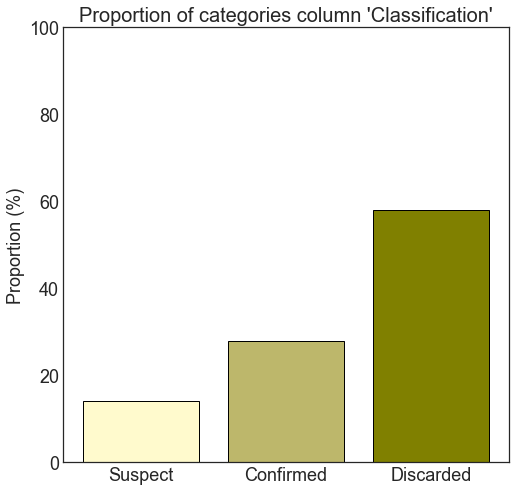

In [186]:
plt.style.use("seaborn-white")
sns.set_palette("vlag")
fig, ax = plt.subplots(figsize = (8, 8))

classification_porportions = df["Classification"].value_counts(normalize = True).sort_values().round(2) * 100

colors = ["lemonchiffon", "darkkhaki" ,"olive"]
ax.bar(classification_porportions.index, classification_porportions, color = colors,edgecolor = "black")

plt.xticks(ticks = ["Confirmados", "Descartados", "Suspeito"], labels = ["Confirmed", "Discarded", "Suspect"], fontsize = 18)
plt.ylabel("Proportion (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of categories column 'Classification'", fontsize = 20)
plt.ylim(0, 100)

plt.show()

In [187]:
df = df.dropna(subset = "Evolution")

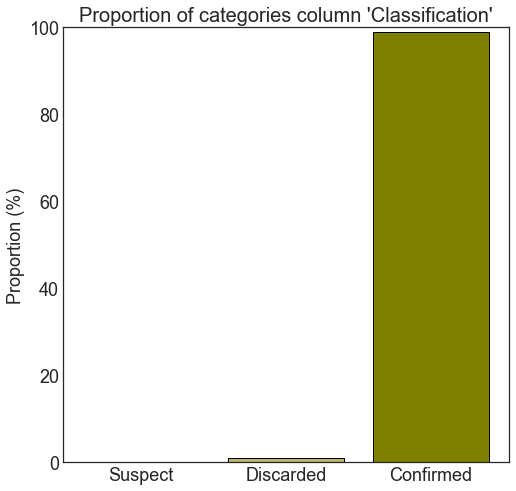

In [188]:
plt.style.use("seaborn-white")
sns.set_palette("vlag")
fig, ax = plt.subplots(figsize = (8, 8))

classification_porportions = df["Classification"].value_counts(normalize = True).sort_values().round(2) * 100

colors = ["lemonchiffon", "darkkhaki" ,"olive"]
ax.bar(classification_porportions.index, classification_porportions, color = colors,edgecolor = "black")

plt.ylabel("Proportion (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(ticks = ["Confirmados", "Descartados", "Suspeito"], labels = ["Confirmed", "Discarded", "Suspect"], fontsize = 18)
plt.title("Proportion of categories column 'Classification'", fontsize = 20)
plt.ylim(0, 100)

plt.show()

- It makes sense because only the evolution of patients who have positive for covid was recorded. 
- Those that were suspected and discarded have no evolution.

In [189]:
((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending = False)

Death_date               97.18
Result_PCR               60.60
Hospitalized             55.21
Pregnant                 46.71
Result_RapidTest         43.64
Race                     24.25
Disabled                  1.18
Comorbidity_obesity       0.04
Throat_pain               0.01
Comorbidity_cardiac       0.01
Fever                     0.01
Comorbidity_pulmonary     0.01
Headache                  0.01
Gender                    0.00
Comorbidity_smoking       0.00
Comorbidity_diabetes      0.00
Comorbidity_renal         0.00
Diarrhea                  0.00
Rhinitis                  0.00
Notification_age          0.00
Cough                     0.00
Breath_difficulty         0.00
Diagnosis_date            0.00
Classification            0.00
Evolution                 0.00
Range_age                 0.00
Register_date             0.00
dtype: float64

Null treatment `pregnant`:

In [190]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [191]:
mask_M = df["Gender"] == "M"
mask_pregnant = df["Pregnant"] == "Yes"
df[mask_M  & mask_pregnant][["Gender", "Pregnant"]]

,Gender,Pregnant
200588,M,Yes
296973,M,Yes
1180319,M,Yes
1365060,M,Yes
1479271,M,Yes
1839551,M,Yes
1847128,M,Yes


Clearly there can be no pregnant men, it is replaced by `np.nan`.

In [192]:
df.loc[mask_M  & mask_pregnant, "Pregnant"] = np.nan

In [193]:
mask_M = df["Gender"] == "M"
mask_pregnant = df["Pregnant"] == "Yes"
df[mask_M  & mask_pregnant][["Gender", "Pregnant"]]

,Gender,Pregnant


Let's see how many nulls there are in the female sex.

In [194]:
mask_F = df["Gender"] == "F"
mask_pregnant_null = df["Pregnant"].isna()

df[mask_F & mask_pregnant_null]

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Rhinitis,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity
35372,2021-10-29,2021-10-15,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"35 anos, 1 meses, 25 dias",...,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não
36357,2021-10-29,2021-10-25,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"33 anos, 11 meses, 6 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
37937,2021-10-29,2021-10-25,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"42 anos, 9 meses, 1 dias",...,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não
43179,2021-10-27,2021-10-24,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"38 anos, 9 meses, 30 dias",...,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não
54585,2021-10-25,2021-10-22,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"41 anos, 5 meses, 25 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207644,2020-04-01,2020-03-29,NaN,Positivo,Positivo,Confirmados,Não,Cura,F,"42 anos, 0 meses, 10 dias",...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não
2207728,2020-04-01,2020-03-22,NaN,NaN,Positivo,Confirmados,Não,Cura,F,"60 anos, 4 meses, 13 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2207755,2020-04-01,2020-03-17,NaN,NaN,Positivo,Confirmados,Não,Cura,F,"38 anos, 2 meses, 18 dias",...,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não
2207778,2020-03-31,2020-03-30,2020-04-28,NaN,Negativo,Descartados,Sim,Óbito por outras causas,F,"88 anos, 10 meses, 17 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [195]:
pregnant_null_abs = df[mask_F & mask_pregnant_null].shape[0]
pregnant_null_pct = np.round((df[mask_F & mask_pregnant_null].shape[0] / df.shape[0] * 100), 2)
print(f"When the 'pregnant' column is selected there are only {pregnant_null_abs} ({pregnant_null_pct}%) nulls.")

When the 'pregnant' column is selected there are only 2576 (0.42%) nulls.


Let's see what happens to the nulls in `Death_date`:

In [196]:
df_covid_evolution = df[["Evolution", "Death_date"]]
df_covid_evolution.head(2)

,Evolution,Death_date
1440,Cura,NaN
2233,Cura,NaN


In [197]:
mask_death_covid_evol = df_covid_evolution["Evolution"] == "Óbito pelo COVID-19" # Death because Covid-19
mask_death_others_evol = df_covid_evolution["Evolution"] == "Óbito por outras causas" # Death beacuse other circumstances

df_covid_death_evol = df_covid_evolution[mask_death_covid_evol | mask_death_others_evol]
df_covid_death_evol.shape

(17259, 2)

In [198]:
df_covid_death_evol["Death_date"].isna().sum()

86

`death_date` only has 86 nulls, the rest are nulls because the patients did not die.

- Although `Result_PCR` and  `Result_RapidTest` have a high proportion of nulls, we will only use these columns for a brief isolated description later.
- The translation into English of the variables is carried out.

In [199]:
df[["Result_PCR", "Result_RapidTest"]] = df[["Result_PCR", "Result_RapidTest"]].replace({"Positivo": "Positive", "Negativo": "Negative"}) 

In [200]:
df[symptoms_cols] = df[symptoms_cols].replace({"Não": "No", "Sim": "Yes"})

In [201]:
df[comorbidity_cols] = df[comorbidity_cols].replace({"Não": "No", "Sim": "Yes"})

In [202]:
df["Hospitalized"] = df["Hospitalized"].replace({"Não": "No", "Sim": "Yes"})

In [203]:
df["Classification"] = df["Classification"].replace({"Confirmados": "Confirmed", "Descartados": "Discarded", "Suspeito": "Suspect"})

In [204]:
df["Evolution"] = df["Evolution"].replace({"Cura": "Cured", "Óbito por outras causas": "Death", "Óbito pelo COVID-19": "Death"})

In [205]:
df["Gender"] = df["Gender"].replace({"M": "Masculine", "F": "Femenine"})

In [206]:
df["Race"] = df["Race"].replace({"Parda": "Brown", "Branca": "White", "Preta": "Black", "Amarela": "Yellow", "Indigena": "Indigenous"})

In [207]:
df["Pregnant"] = df["Pregnant"].replace({"Não": "No"})

In [208]:
df["Disabled"] = df["Disabled"].replace({"Não": "No", "Sim": "Yes"})

<a id='3.B.2'></a>

### 3.B.2 Datetime variables

In [209]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Pregnant',
       'Disabled', 'Fever', 'Breath_difficulty', 'Cough', 'Rhinitis',
       'Throat_pain', 'Diarrhea', 'Headache', 'Comorbidity_pulmonary',
       'Comorbidity_cardiac', 'Comorbidity_renal', 'Comorbidity_diabetes',
       'Comorbidity_smoking', 'Comorbidity_obesity'],
      dtype='object')

In [210]:
date_data = ["Diagnosis_date", "Register_date", "Death_date"]

for i in date_data:
    df[i] = pd.to_datetime(df[i])

In [211]:
df.dtypes

Register_date            datetime64[ns]
Diagnosis_date           datetime64[ns]
Death_date               datetime64[ns]
Result_PCR                     category
Result_RapidTest               category
Classification                 category
Hospitalized                   category
Evolution                        object
Gender                           object
Notification_age                 object
Range_age                      category
Race                           category
Pregnant                       category
Disabled                       category
Fever                          category
Breath_difficulty              category
Cough                          category
Rhinitis                       category
Throat_pain                    category
Diarrhea                       category
Headache                       category
Comorbidity_pulmonary          category
Comorbidity_cardiac            category
Comorbidity_renal              category
Comorbidity_diabetes           category


Cases where `df["Diagnosis_date"] > df["Register_date"]` should be removed because the registration date is always after the diagnosis date.

In [212]:
mask_Diag_great_Reg = df["Diagnosis_date"] > df["Register_date"]
df = df[~mask_Diag_great_Reg]

Proceed to calculate `df["Register_date"] - df["Diagnosis_date"]`.

In [213]:
df["Delta_RegDiag"] = (df["Register_date"] - df["Diagnosis_date"]).dt.days
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,Yes,No,No,No,No,No,No,1
2233,2021-11-10,2021-09-17,NaT,NaN,Positive,Confirmed,NaN,Cured,Masculine,"33 anos, 1 meses, 3 dias",...,No,No,Yes,No,No,No,No,No,No,54
2546,2021-11-10,2020-12-28,NaT,NaN,Positive,Confirmed,No,Cured,Masculine,"63 anos, 5 meses, 10 dias",...,Yes,No,No,No,No,Yes,No,No,No,317
2725,2021-11-10,2021-01-02,NaT,NaN,Positive,Confirmed,No,Cured,Masculine,"38 anos, 4 meses, 15 dias",...,No,No,No,No,No,No,No,No,No,312
2758,2021-11-10,2021-09-16,NaT,NaN,Positive,Confirmed,NaN,Cured,Masculine,"36 anos, 7 meses, 30 dias",...,Yes,No,Yes,No,No,No,No,No,No,55


Those patients with `Delta_RegDiag > 7 days` are eliminated.

In [214]:
mask_Delta_RegDiag = df["Delta_RegDiag"] > 7
df = df[~mask_Delta_RegDiag]
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,Yes,No,No,No,No,No,No,1
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,Yes,Yes,No,No,No,No,No,No,2
3155,2021-11-02,2021-10-29,NaT,Positive,Positive,Confirmed,No,Cured,Masculine,"77 anos, 0 meses, 15 dias",...,No,Yes,No,No,No,No,No,No,No,4
4727,2021-11-10,2021-11-05,2019-11-10,NaN,Negative,Discarded,Yes,Death,Masculine,"47 anos, 3 meses, 25 dias",...,No,No,No,No,No,No,No,No,No,5
6785,2021-11-09,2021-11-02,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"33 anos, 5 meses, 12 dias",...,Yes,No,Yes,No,No,No,No,No,No,7


The same goes for the `Death_date` column which cannot be less than `Register_date`.

In [215]:
mask_Death_less_Reg = df["Death_date"] < df["Register_date"]
df = df[~mask_Death_less_Reg]
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,Yes,No,No,No,No,No,No,1
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,Yes,Yes,No,No,No,No,No,No,2
3155,2021-11-02,2021-10-29,NaT,Positive,Positive,Confirmed,No,Cured,Masculine,"77 anos, 0 meses, 15 dias",...,No,Yes,No,No,No,No,No,No,No,4
6785,2021-11-09,2021-11-02,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"33 anos, 5 meses, 12 dias",...,Yes,No,Yes,No,No,No,No,No,No,7
7372,2021-11-09,2021-11-09,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"59 anos, 1 meses, 11 dias",...,No,No,No,No,No,No,No,No,No,0


Proceed to calculate `df["Death_date"] - df["Register_date"]`.

In [216]:
df["Delta_DeathReg"] = (df["Death_date"] - df["Register_date"]).dt.days
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,No,No,No,No,No,No,1,NaN
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,Yes,Yes,No,No,No,No,No,No,2,NaN
3155,2021-11-02,2021-10-29,NaT,Positive,Positive,Confirmed,No,Cured,Masculine,"77 anos, 0 meses, 15 dias",...,Yes,No,No,No,No,No,No,No,4,NaN
6785,2021-11-09,2021-11-02,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"33 anos, 5 meses, 12 dias",...,No,Yes,No,No,No,No,No,No,7,NaN
7372,2021-11-09,2021-11-09,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"59 anos, 1 meses, 11 dias",...,No,No,No,No,No,No,No,No,0,NaN


In [217]:
df["Delta_DeathReg"].describe()

count    11792.000000
mean        14.911889
std         17.974500
min          0.000000
25%          4.000000
50%         11.000000
75%         20.000000
max        540.000000
Name: Delta_DeathReg, dtype: float64

In [218]:
df["Delta_DeathReg"].isna().sum()

447324

Later the analysis will be done on the null data contained in this column.

<a id='3.B.3'></a>

### 3.B.3 Calculating Age

In [219]:
# Function to obtain the age of the column "Notification_age"

def getnumber(text):
    words = text.split()
    return words[0]

In [220]:
df["Age"] = df.apply(lambda x: getnumber(x.Notification_age), axis=1)
df["Age"] = df["Age"].astype(int)

Checking for nulls in `Age` column.

In [221]:
df["Age"].isna().sum()

0

In [222]:
df["Age"].describe()

count    459116.000000
mean         39.834499
std          17.522008
min          -1.000000
25%          27.000000
50%          38.000000
75%          51.000000
max         121.000000
Name: Age, dtype: float64

`df["Age"] < 0` are observed, they will be taken into account as null data to be replaced by the median of the population as appropriate by sex.

In [223]:
mask_age_below_0 = df["Age"] < 0
df.loc[mask_age_below_0, "Age"] = np.nan

In [224]:
df["Age"].isna().sum()

14

In [225]:
mask_F = df["Gender"] == "Femenine"
mask_age_null = df["Age"].isna()

df.loc[mask_F & mask_age_null, "Age"] = df.loc[mask_F, "Age"].median()

In [226]:
mask_M = df["Gender"] == "Masculine"
mask_age_null = df["Age"].isna()

df.loc[mask_M & mask_age_null, "Age"] = df.loc[mask_M, "Age"].median()

In [227]:
df["Age"].isna().sum()

0

- There are no nulls in `Age`.
- `df["Age"] >= 18` are selected.

In [228]:
mask_adult = df["Age"] >= 18
df = df[mask_adult]

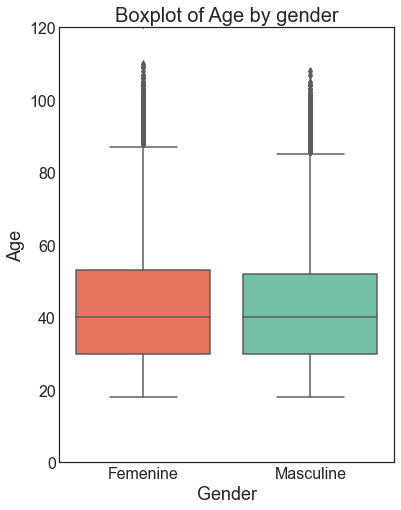

In [229]:
fig, ax = plt.subplots(figsize = (6,8))

plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Gender", y = "Age", data = df)

plt.title("Boxplot of Age by gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.show()

Outliers are removed.

In [230]:
iqr_age = iqr(df["Age"])
low_thres_age = np.quantile(df["Age"], 0.25) - (1.5 * iqr_age)
high_thres_age = np.quantile(df["Age"], 0.75) + (1.5 * iqr_age)

In [231]:
df = df[(df["Age"] >= low_thres_age) & (df["Age"] <= high_thres_age)]

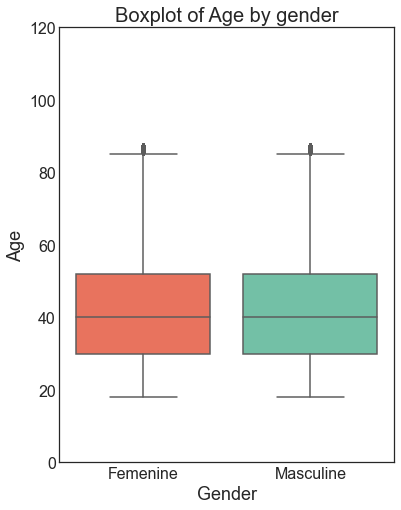

In [232]:
fig, ax = plt.subplots(figsize = (6,8))

plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Gender", y = "Age", data = df)

plt.title("Boxplot of Age by gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.show()

<a id='3.B.4'></a>

### 3.B.4 n_comor and n_sym columns creation

In [233]:
df["n_comor"] = df[comorbidity_cols].replace({"Yes": 1, "No": 0}).fillna(0).astype("int").sum(axis = 1)
df.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,No,No,No,No,No,No,1,NaN,39.0,0
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,No,No,No,No,No,2,NaN,24.0,0


In [234]:
df["n_symp"] = df[symptoms_cols].replace({"Yes": 1, "No": 0}).fillna(0).astype("int").sum(axis = 1)
df.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor,n_symp
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,No,No,No,No,No,1,NaN,39.0,0,6
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,No,No,No,No,2,NaN,24.0,0,4


<a id='3.C'></a>

### 3.C Filtered

In [235]:
mask_confirmed = df["Classification"] == "Confirmed"
df = df[mask_confirmed]

- A confirmed patient is considered if it has a positive test. Otherwise it is discarded.
- First, those patients who were confirmed by Covid will be searched for but do not have any tests to support it.

In [236]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Pregnant',
       'Disabled', 'Fever', 'Breath_difficulty', 'Cough', 'Rhinitis',
       'Throat_pain', 'Diarrhea', 'Headache', 'Comorbidity_pulmonary',
       'Comorbidity_cardiac', 'Comorbidity_renal', 'Comorbidity_diabetes',
       'Comorbidity_smoking', 'Comorbidity_obesity', 'Delta_RegDiag',
       'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [237]:
mask_PCR_not_positive = (df["Result_PCR"] == "Negative") | (df["Result_PCR"].isna())
mask_RapidTest_not_positive = (df["Result_RapidTest"] == "Negative") | (df["Result_RapidTest"].isna())
mask_not_positive = mask_PCR_not_positive & mask_RapidTest_not_positive
df[mask_not_positive].shape

(29616, 32)

- There are 29622 that do not have any test that supports the confirmation of covid.

- These are removed from the analysis.

In [238]:
df = df[~mask_not_positive]
df.shape

(384429, 32)

In [239]:
df = df.reset_index().drop("index", axis = 1)

<a id='3.D'></a>

### 3.D At last

In [240]:
df = df.drop(["Notification_age", "Range_age"], axis = 1)

In [241]:
df.to_csv("df_to_analize.csv", encoding = "latin-1")